# Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay, brier_score_loss
)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV

# Extração da base de dados

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/xG/"

X_train = pd.read_csv(path + "X_train_.csv")
X_test  = pd.read_csv(path + "X_test_.csv")
y_train = pd.read_csv(path + "y_train.csv")
y_test  = pd.read_csv(path + "y_test.csv")
xg = pd.read_csv(path + 'X_baseline.csv')
xg_baseline = xg.loc[X_test.index]
xg_baseline = xg_baseline['shot_statsbomb_xg'].values

# Funções Auxiliares

In [ ]:
def result(X_test, model):

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    brier = brier_score_loss(y_test, y_prob)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nBrier Score: ", round(brier, 4))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusão")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title("Curva ROC")
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(y_prob, color='blue', label='Naive Bayes (xG)', kde=True, stat='density', linewidth=0)
    sns.histplot(xg_baseline_test, color='red', label='StatsBomb (xG)', kde=True, stat='density', linewidth=0)
    plt.title('Distribuição de Probabilidades Previstas (Teste)')
    plt.xlabel('Probabilidade Prevista (xG)')
    plt.legend()
    plt.show()

    plt.hist(y_prob, bins=100)
    plt.show()

    print("Min", np.min(y_prob))
    print("Max", np.max(y_prob))
    print("Mean", np.mean(y_prob))

# Treinamento 1 - Modelo Base

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.50      0.31      0.38       167

    accuracy                           0.89      1567
   macro avg       0.71      0.63      0.66      1567
weighted avg       0.88      0.89      0.88      1567


Brier Score:  0.0997


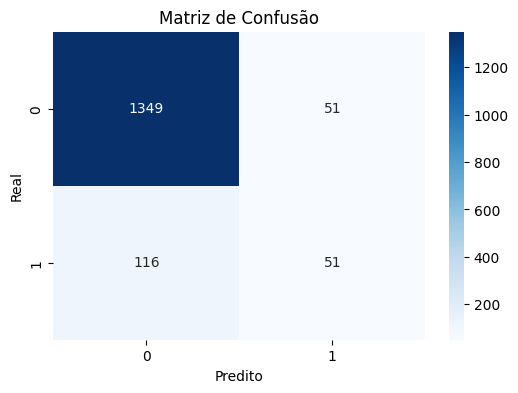

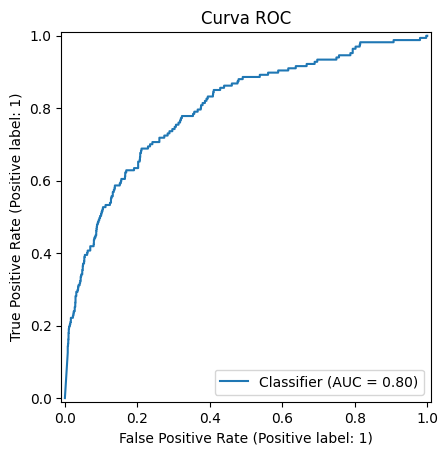

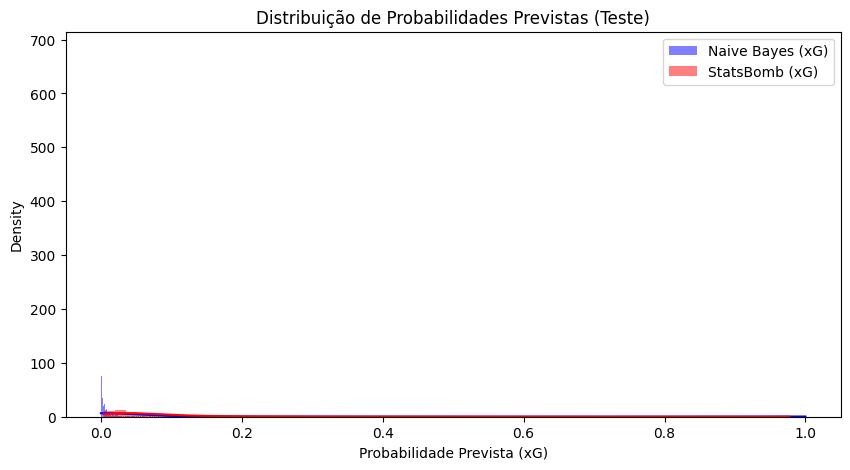

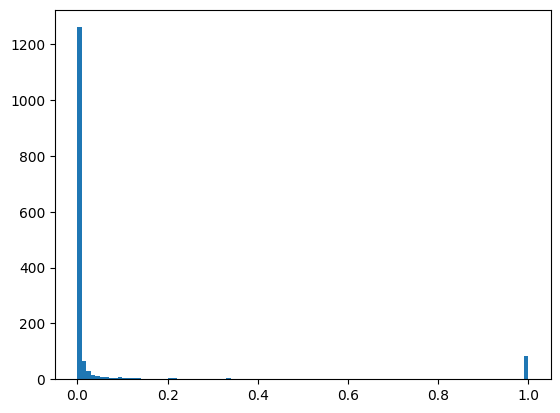

Min 9.126005366836255e-84
Max 1.0
Mean 0.07398146300980825


In [ ]:
result(X_test, model)

# Treinamento 2 - Modelo Base + PCA

## PCA

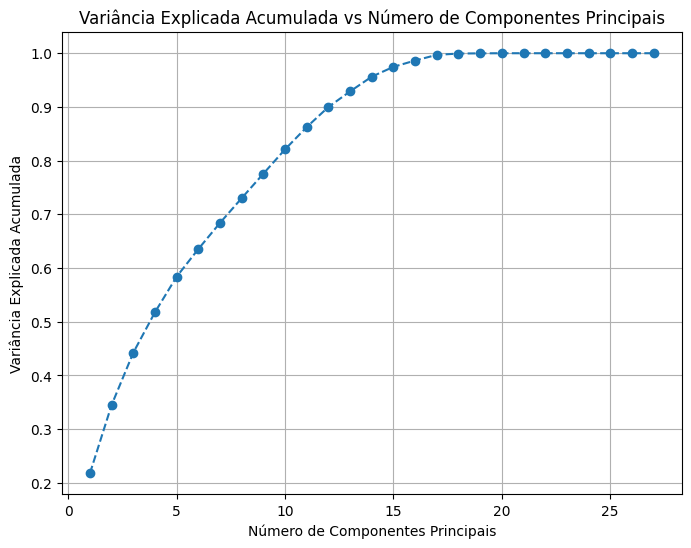

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar o PCA
pca = PCA()
pca.fit(X_train_scaled)

# Plotar a variância explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, X_train_scaled.shape[1] + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada vs Número de Componentes Principais')
plt.grid(True)
plt.show()

## 2 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1400
           1       0.56      0.22      0.31       167

    accuracy                           0.90      1567
   macro avg       0.74      0.60      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0899


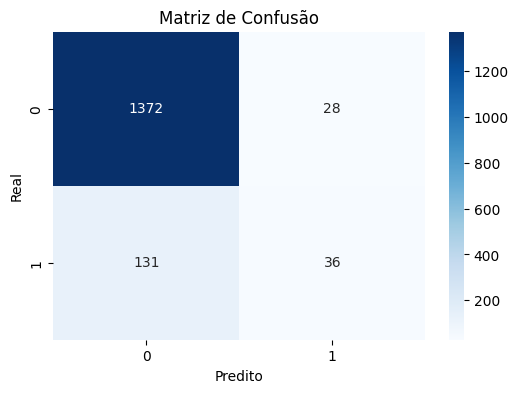

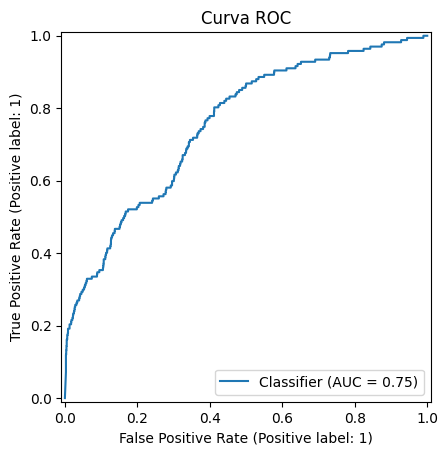

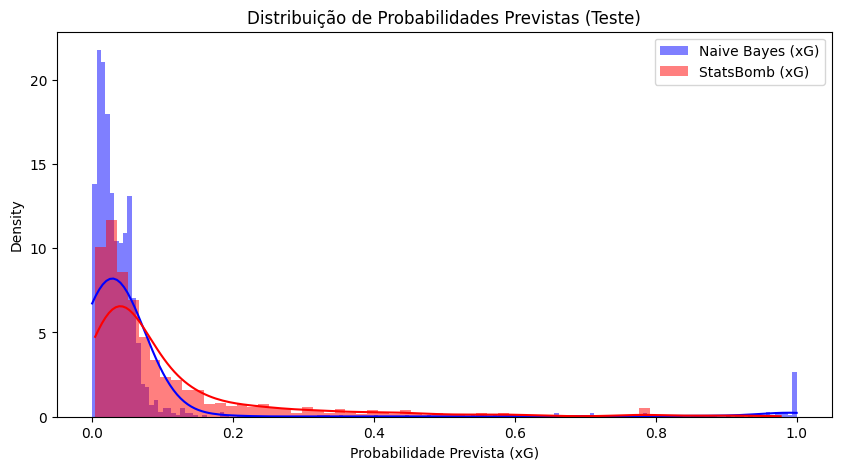

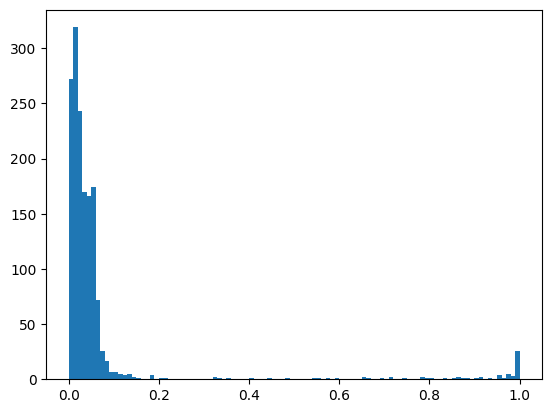

Min 9.731403270186221e-05
Max 1.0
Mean 0.06936629260558717


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB()
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## 5 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1400
           1       0.54      0.22      0.31       167

    accuracy                           0.90      1567
   macro avg       0.72      0.60      0.63      1567
weighted avg       0.87      0.90      0.88      1567


Brier Score:  0.089


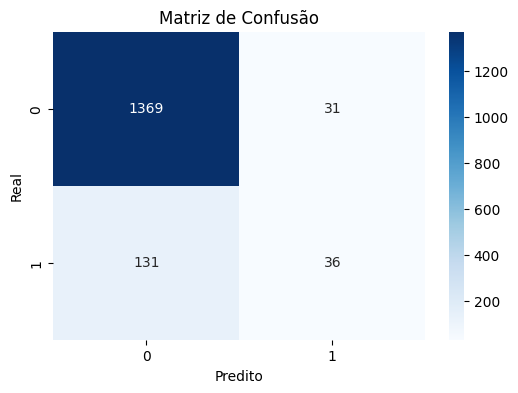

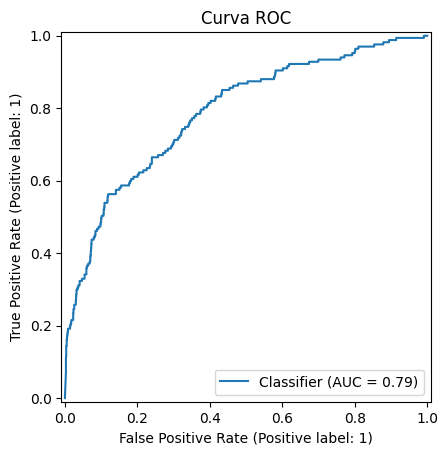

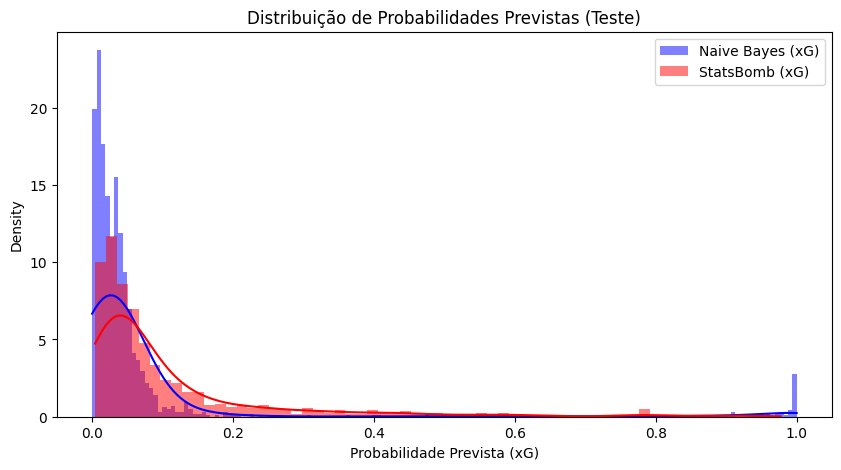

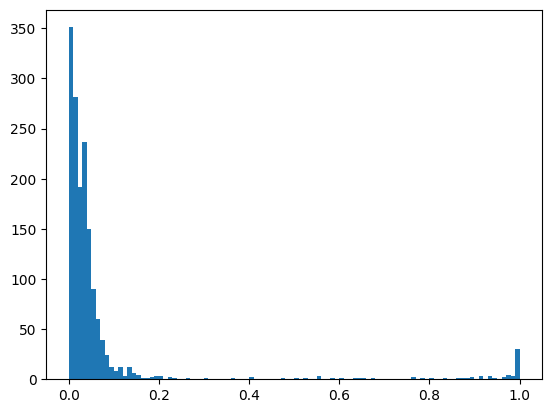

Min 6.76333382670488e-05
Max 1.0
Mean 0.07115778326710145


In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB()
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## 7 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1400
           1       0.54      0.22      0.31       167

    accuracy                           0.90      1567
   macro avg       0.73      0.60      0.63      1567
weighted avg       0.87      0.90      0.88      1567


Brier Score:  0.0911


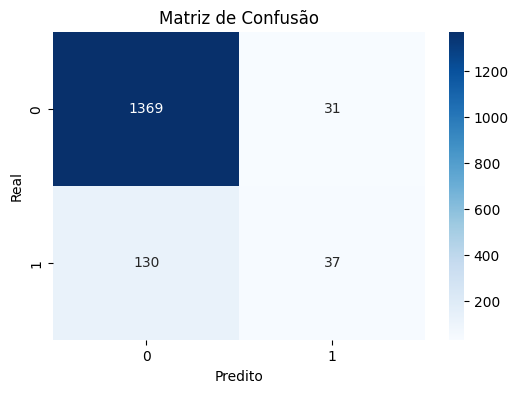

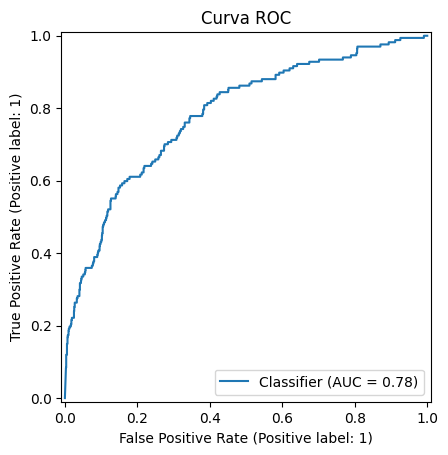

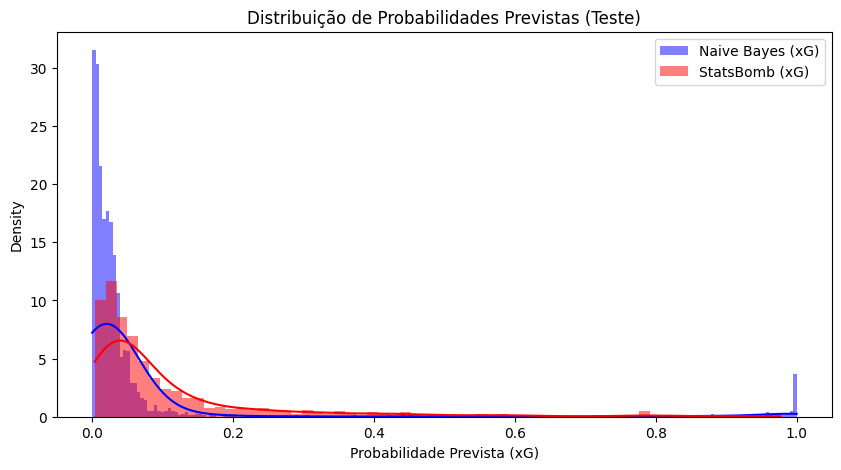

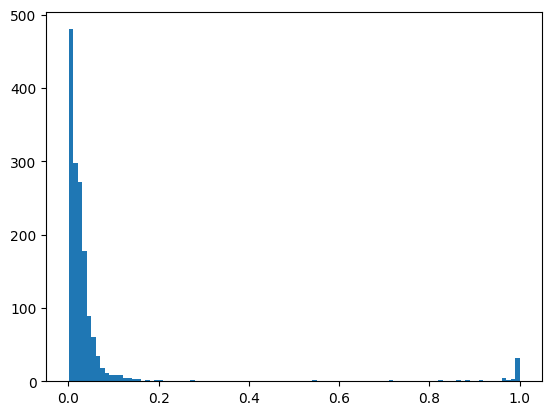

Min 0.0005548668119791909
Max 1.0
Mean 0.06624612220264957


In [ ]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB()
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## 10 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1400
           1       0.53      0.23      0.32       167

    accuracy                           0.90      1567
   macro avg       0.72      0.60      0.63      1567
weighted avg       0.87      0.90      0.88      1567


Brier Score:  0.0952


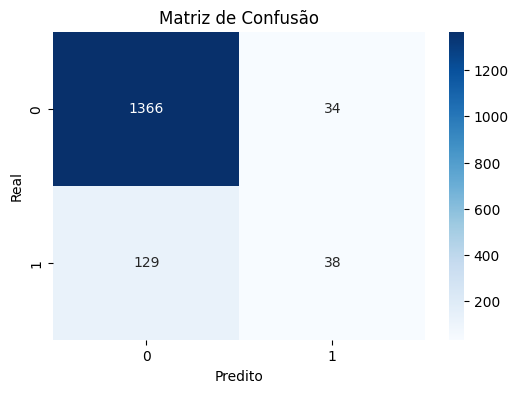

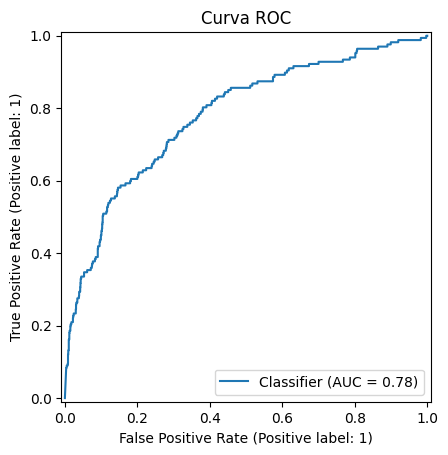

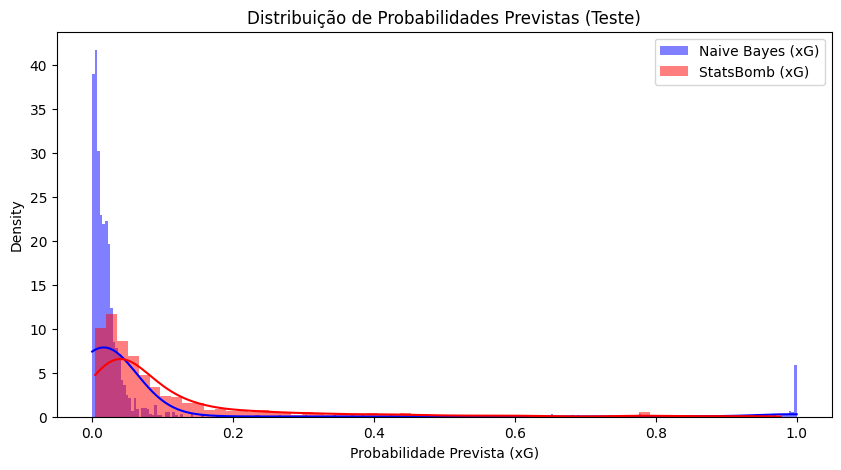

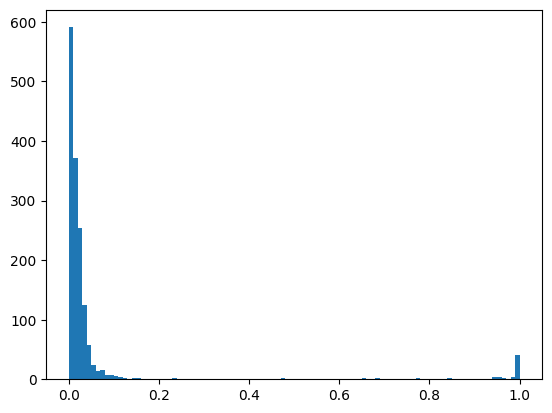

Min 5.960435523153471e-24
Max 1.0
Mean 0.06384823265302288


In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB()
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## 14 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1400
           1       0.48      0.25      0.32       167

    accuracy                           0.89      1567
   macro avg       0.70      0.61      0.63      1567
weighted avg       0.87      0.89      0.87      1567


Brier Score:  0.1052


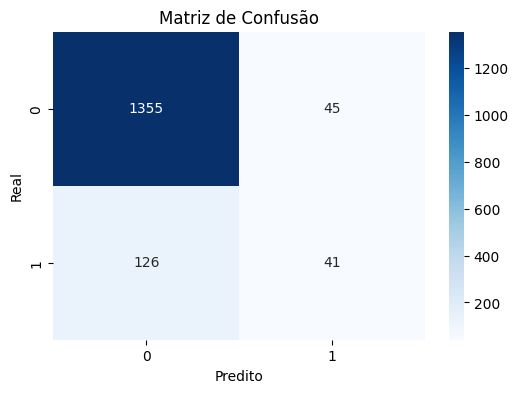

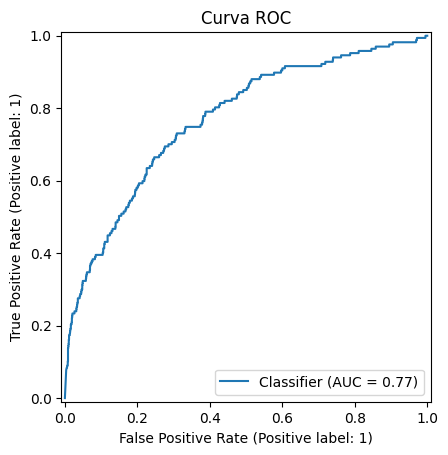

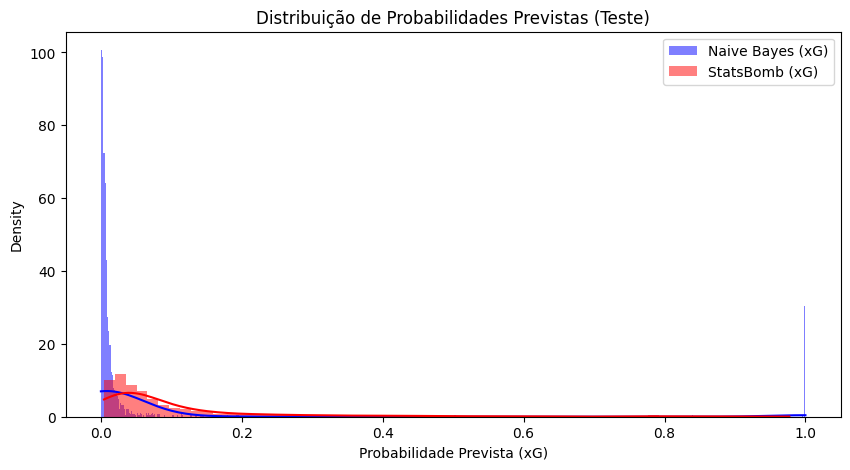

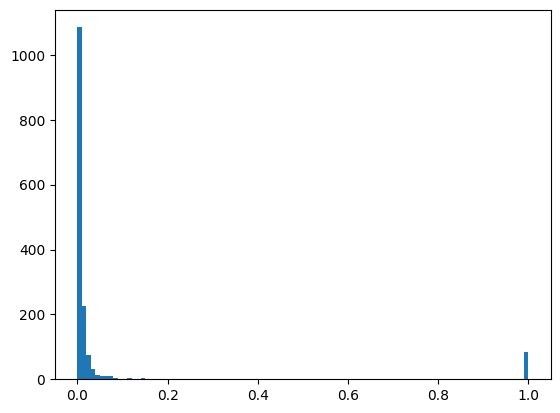

Min 2.8031292564335778e-24
Max 1.0
Mean 0.06471998432770097


In [ ]:
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB()
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## 17 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.46      0.31      0.37       167

    accuracy                           0.89      1567
   macro avg       0.69      0.63      0.66      1567
weighted avg       0.87      0.89      0.88      1567


Brier Score:  0.106


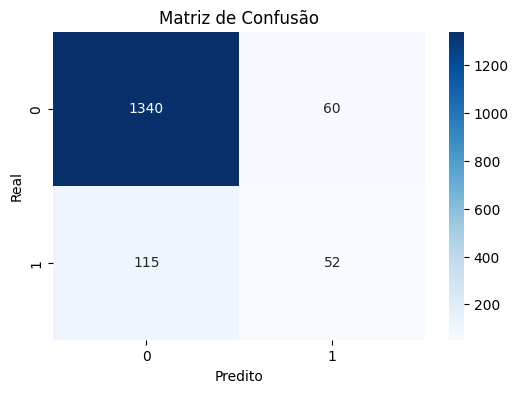

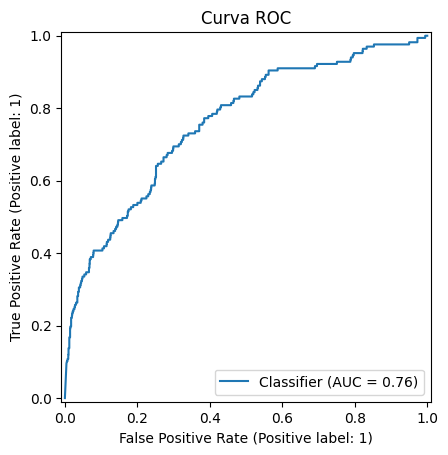

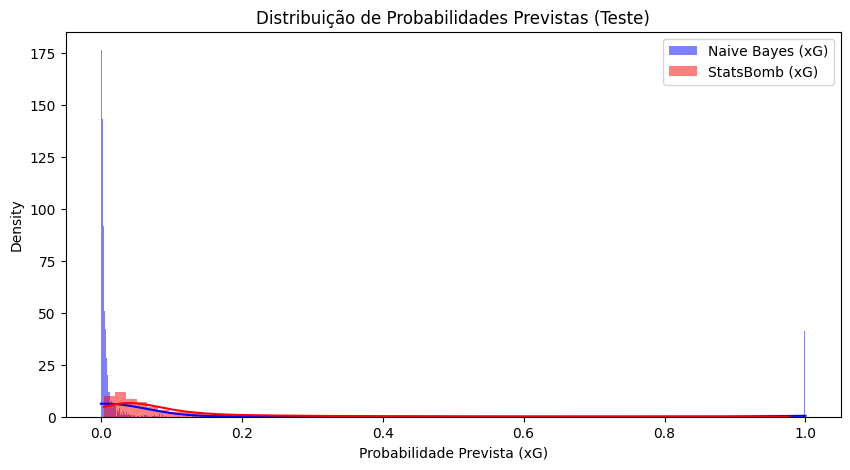

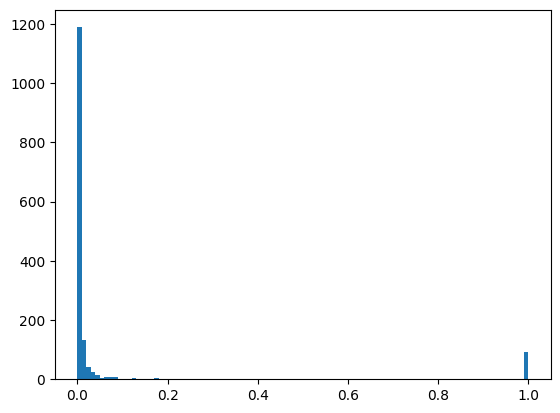

Min 1.872876425419425e-24
Max 1.0
Mean 0.07833884702636071


In [ ]:
pca = PCA(n_components=17)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB()
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## 20 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.47      0.31      0.37       167

    accuracy                           0.89      1567
   macro avg       0.69      0.63      0.65      1567
weighted avg       0.87      0.89      0.88      1567


Brier Score:  0.1074


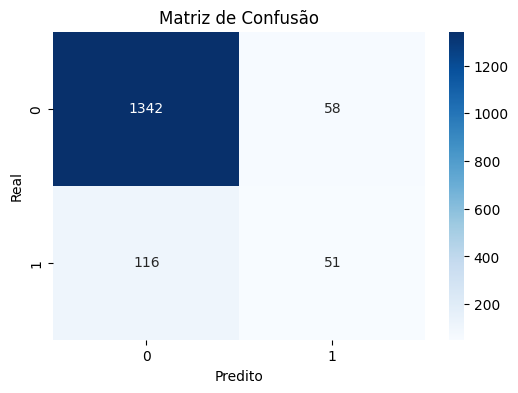

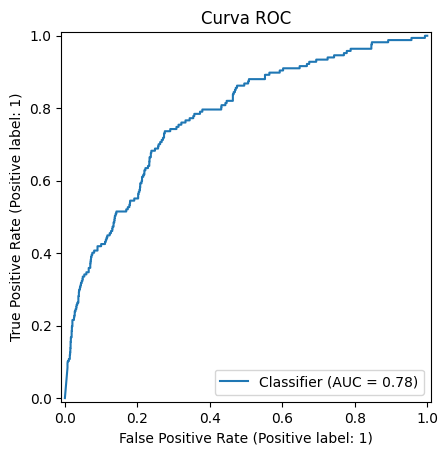

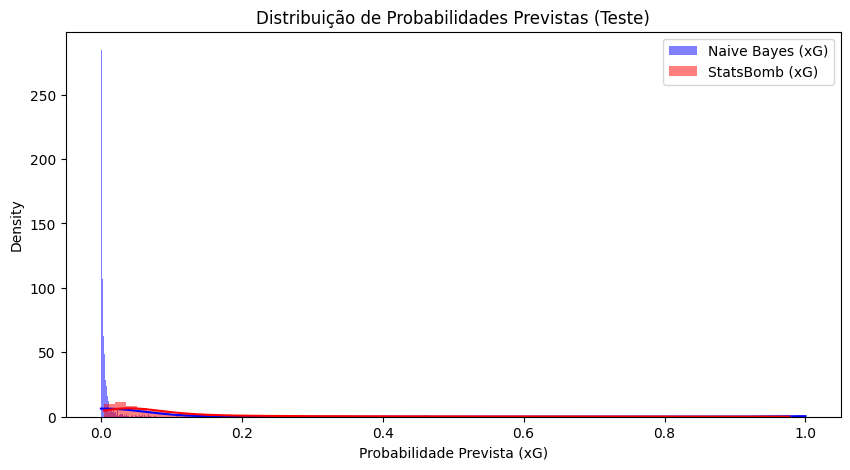

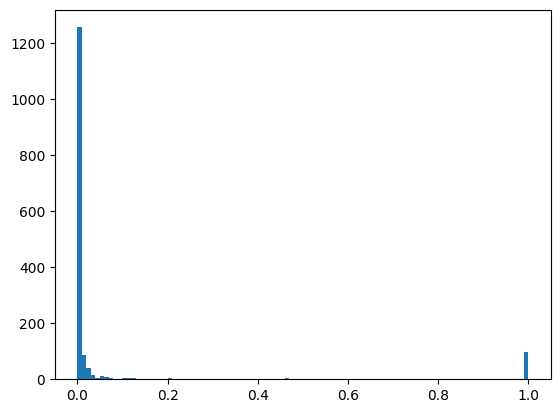

Min 3.456787170128956e-27
Max 1.0
Mean 0.07687487681664193


In [ ]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB()
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## 23 Componentes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.47      0.31      0.37       167

    accuracy                           0.89      1567
   macro avg       0.69      0.63      0.65      1567
weighted avg       0.87      0.89      0.88      1567


Brier Score:  0.1074


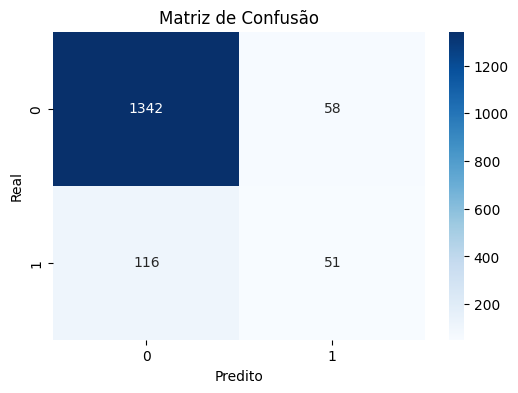

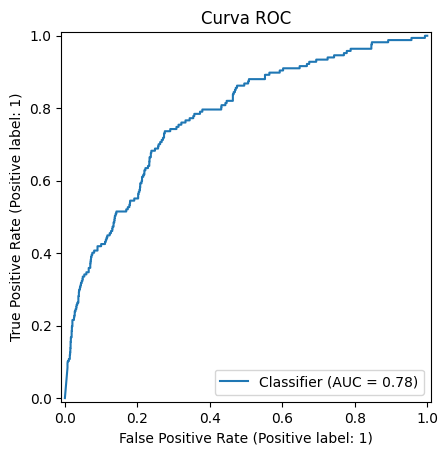

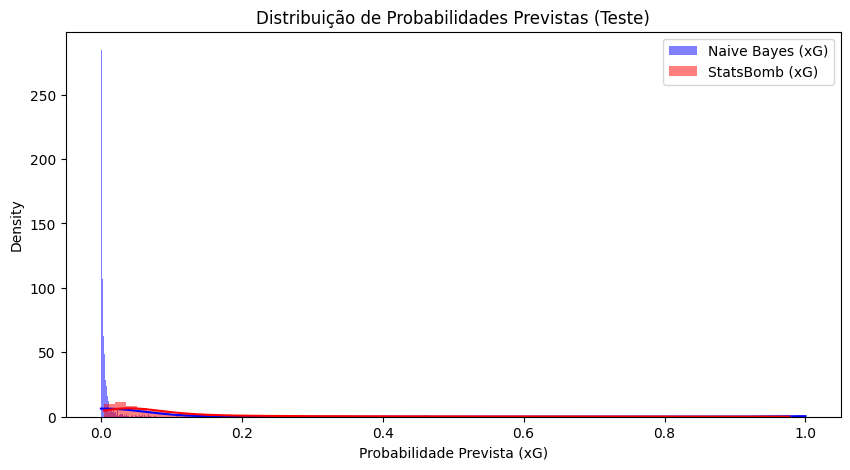

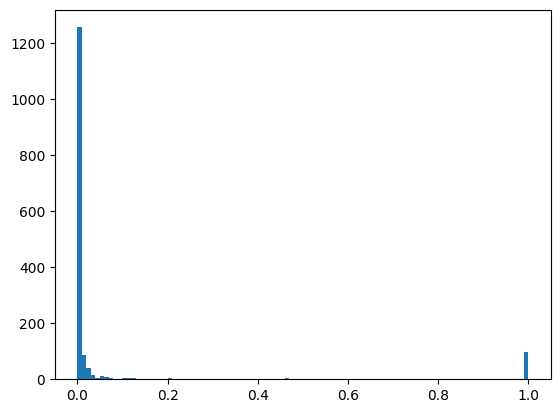

Min 3.456787170128956e-27
Max 1.0
Mean 0.07687487681664192


In [ ]:
pca = PCA(n_components=23)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB()
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## Análise das métricas em relação ao PCA

In [ ]:

max_components = X_train_scaled.shape[1]

resultados = []

for n_components in range(1, max_components + 1):
    pca = PCA(n_components=n_components)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca  = pca.transform(X_test_scaled)

    model = GaussianNB()
    model.fit(X_train_pca, y_train.values.ravel())

    y_pred = model.predict(X_test_pca)
    y_prob = model.predict_proba(X_test_pca)[:, 1]

    resultados.append({
        "n_components": n_components,
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "recall": recall_score(y_test, y_pred),
        "brier": brier_score_loss(y_test, y_prob)
    })

results_df = pd.DataFrame(resultados)
results_df.head()

,n_components,accuracy,roc_auc,recall,brier
0,1,0.893427,0.683086,0.000000,0.091635
1,2,0.898532,0.753678,0.215569,0.089852
2,3,0.897894,0.762648,0.215569,0.089606
3,4,0.897256,0.763204,0.215569,0.089576
4,5,0.896618,0.787874,0.215569,0.088956


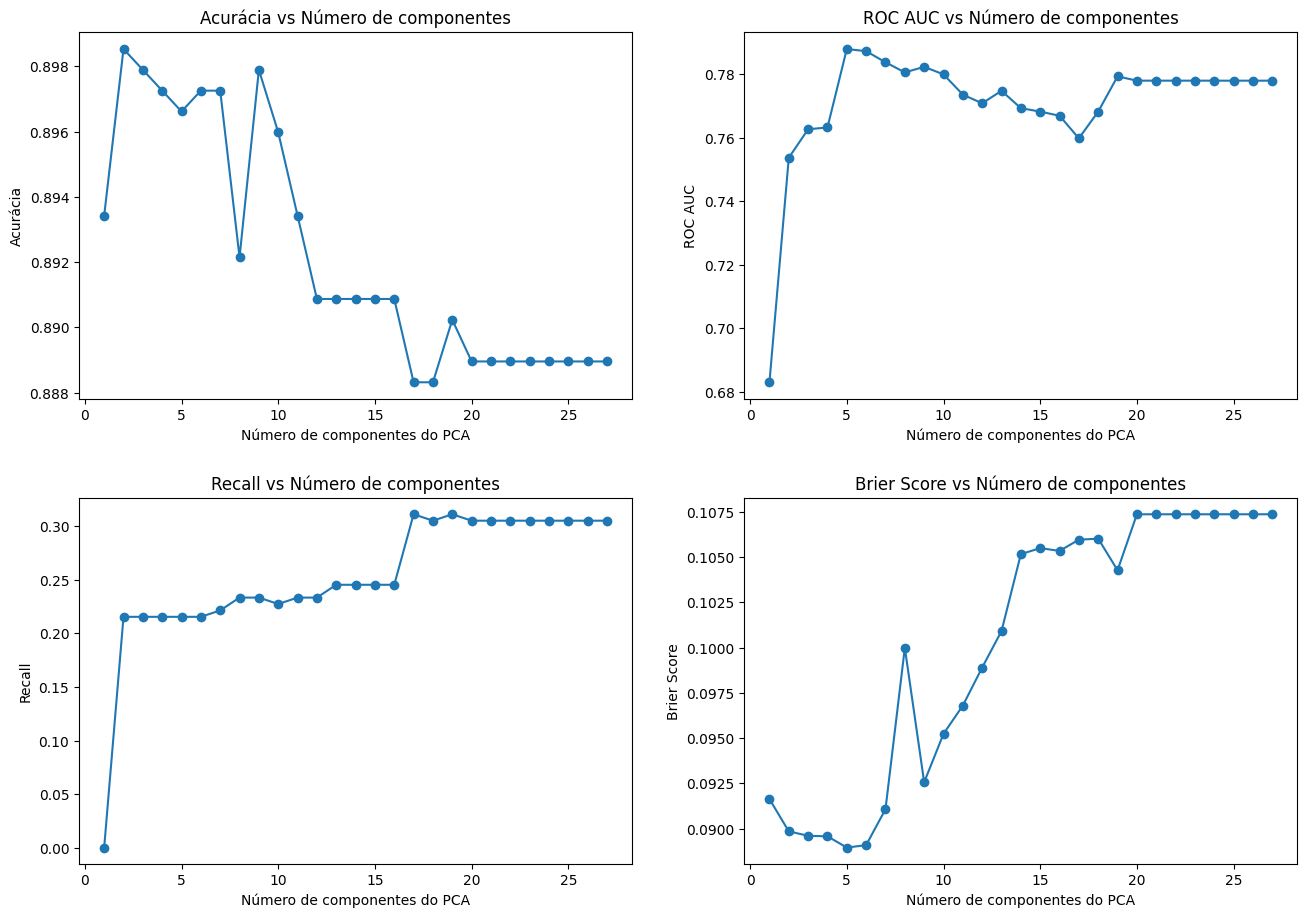

In [ ]:
results_df = pd.DataFrame(resultados, columns=["n_components", "accuracy", "roc_auc", "recall", "brier"])

# Criando uma grid de gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid para as 4 métricas
fig.tight_layout(pad=5.0)  # Ajuste do espaçamento

metrics = ["accuracy", "roc_auc", "recall", "brier"]
titles = ["Acurácia", "ROC AUC", "Recall", "Brier Score"]

for i, metric in enumerate(metrics):
    row = i // 2  # Calculando a linha (0 ou 1)
    col = i % 2   # Calculando a coluna (0 ou 1)

    axes[row, col].plot(results_df["n_components"], results_df[metric], marker='o')
    axes[row, col].set_xlabel("Número de componentes do PCA")
    axes[row, col].set_ylabel(titles[i])
    axes[row, col].set_title(f"{titles[i]} vs Número de componentes")

plt.show()

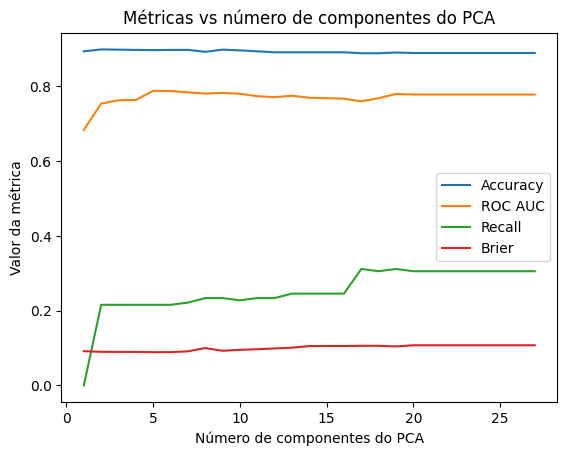

In [ ]:
results_plot = results_df.copy()

# Inverter Brier para manter interpretação "quanto maior, melhor"
results_plot["brier_inv"] = results_plot["brier"]

plt.figure()
plt.plot(results_plot["n_components"], results_plot["accuracy"], label="Accuracy")
plt.plot(results_plot["n_components"], results_plot["roc_auc"], label="ROC AUC")
plt.plot(results_plot["n_components"], results_plot["recall"], label="Recall")
plt.plot(results_plot["n_components"], results_plot["brier_inv"], label="Brier")

plt.xlabel("Número de componentes do PCA")
plt.ylabel("Valor da métrica")
plt.title("Métricas vs número de componentes do PCA")
plt.legend()
plt.show()


# Treinamento 3 - Otimização de Hiperparâmetros

## Acurácia

In [ ]:
pipeline = Pipeline([
    ("gnb", GaussianNB())
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "gnb__var_smoothing": np.logspace(-20, -1, 10)
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhor parâmetro:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhor parâmetro: {'gnb__var_smoothing': np.float64(0.0007742636826811277)}
Melhor score CV: 0.8989443865075257


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.50      0.31      0.38       167

    accuracy                           0.89      1567
   macro avg       0.71      0.63      0.66      1567
weighted avg       0.88      0.89      0.88      1567


Brier Score:  0.09


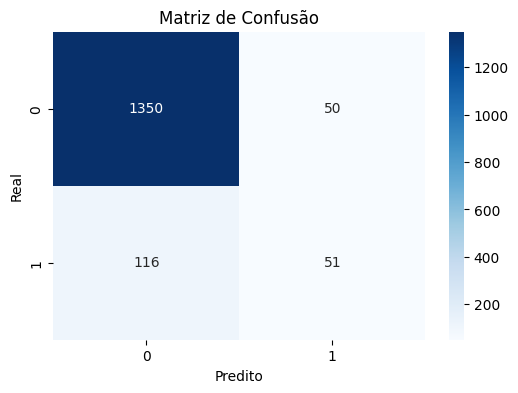

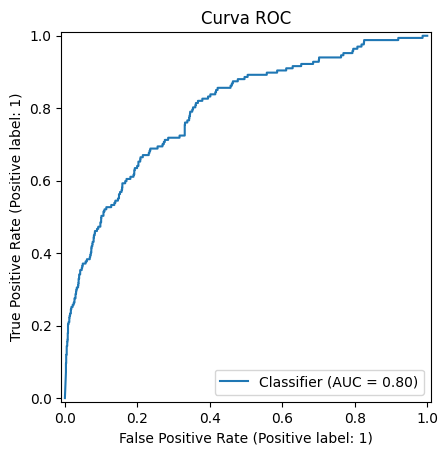

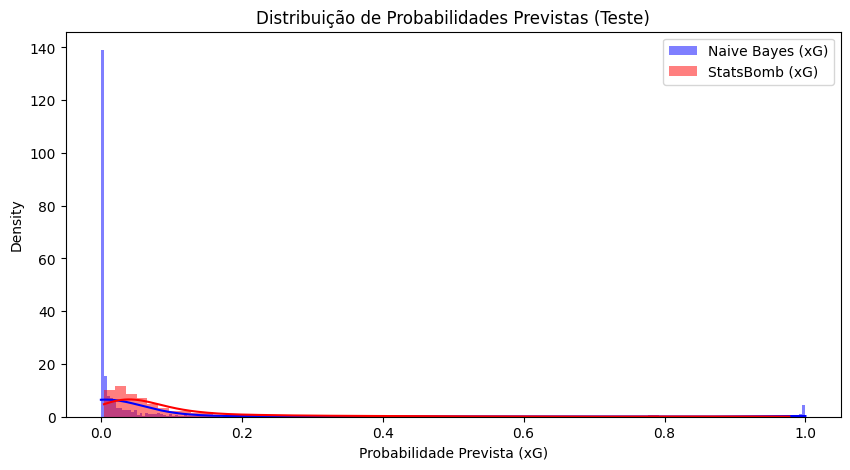

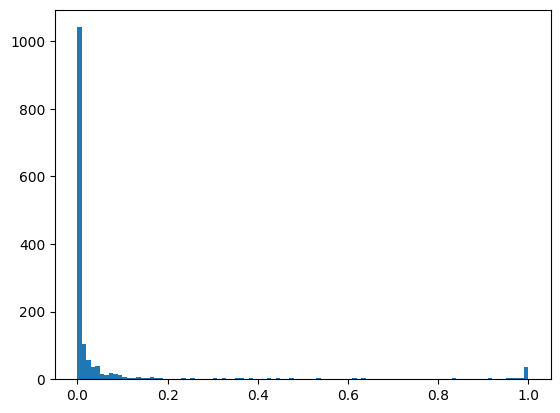

Min 5.166710081864098e-34
Max 1.0
Mean 0.08143833779961827


In [ ]:
model = Pipeline([
    ("gnb", GaussianNB(var_smoothing=0.0007742636826811277))
])

model.fit(X_train, y_train.values.ravel())
result(X_test, model)

## Auc

In [ ]:
pipeline = Pipeline([
    ("gnb", GaussianNB())
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "gnb__var_smoothing": np.logspace(-20, -1, 10)
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhor parâmetro:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhor parâmetro: {'gnb__var_smoothing': np.float64(5.9948425031894214e-06)}
Melhor score CV: 0.8018022313912555


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.50      0.31      0.38       167

    accuracy                           0.89      1567
   macro avg       0.71      0.63      0.66      1567
weighted avg       0.88      0.89      0.88      1567


Brier Score:  0.0999


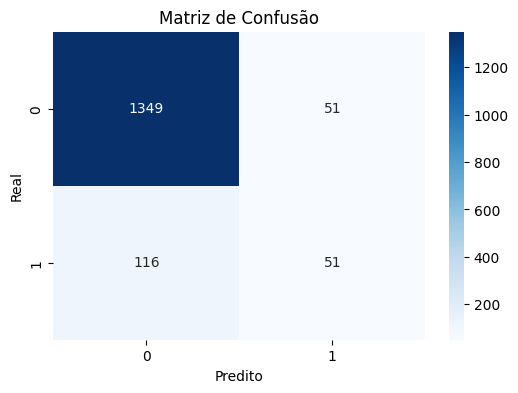

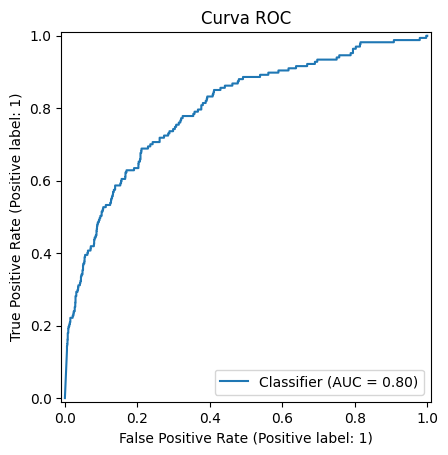

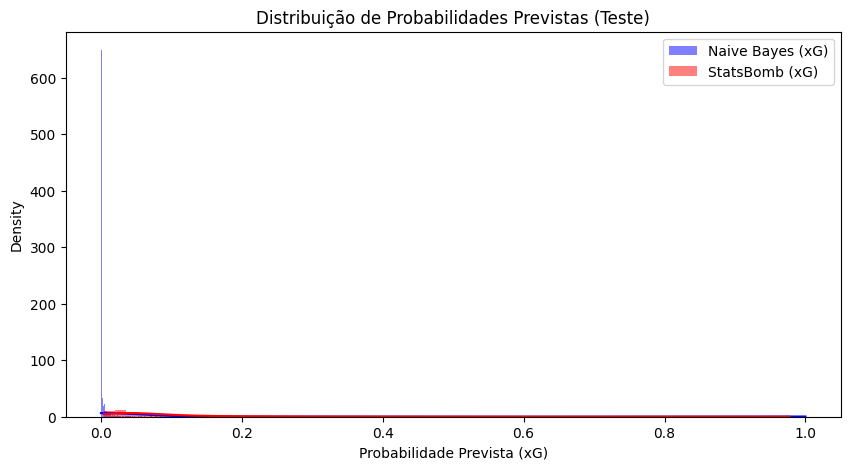

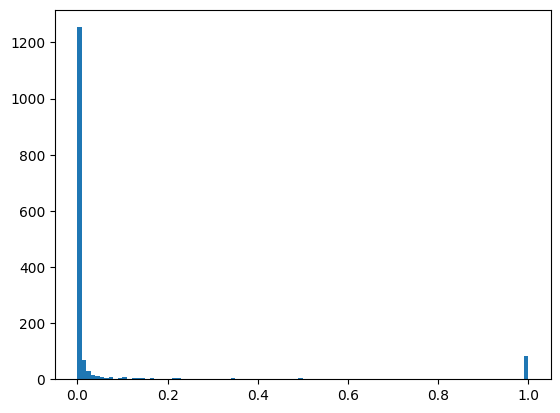

Min 4.723285288685033e-34
Max 1.0
Mean 0.07479616848322686


In [ ]:
model = Pipeline([
    ("gnb", GaussianNB(var_smoothing=5.9948425031894214e-06))
])

model.fit(X_train, y_train.values.ravel())
result(X_test, model)

## Recall

In [ ]:
pipeline = Pipeline([
    ("gnb", GaussianNB())
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "gnb__var_smoothing": np.logspace(-20, -1, 10)
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhor parâmetro:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhor parâmetro: {'gnb__var_smoothing': np.float64(1e-20)}
Melhor score CV: 0.5701492537313433


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.50      0.31      0.38       167

    accuracy                           0.89      1567
   macro avg       0.71      0.63      0.66      1567
weighted avg       0.88      0.89      0.88      1567


Brier Score:  0.0997


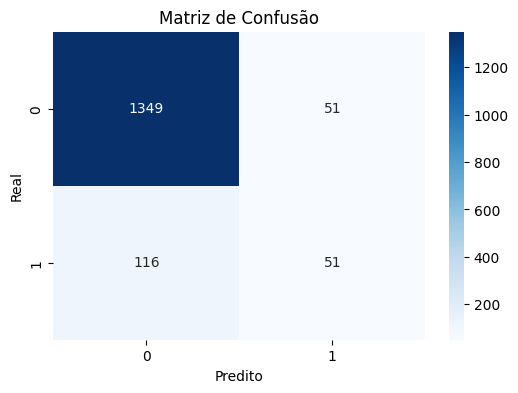

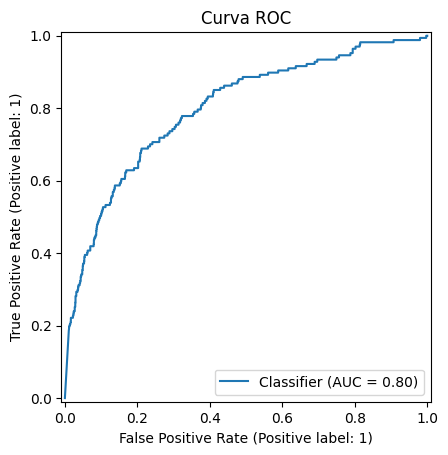

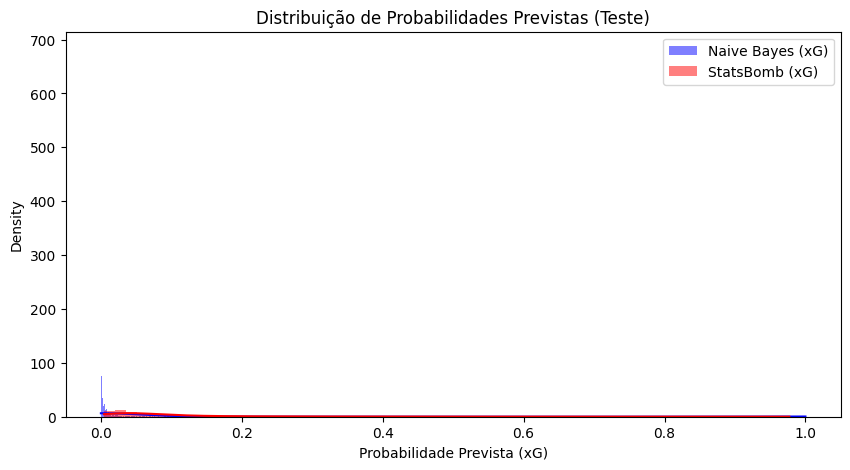

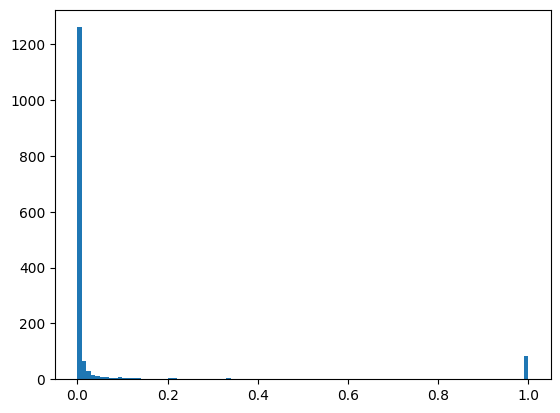

Min 8.761753477841244e-84
Max 1.0
Mean 0.07398150174829665


In [ ]:
model = Pipeline([
    ("gnb", GaussianNB(var_smoothing=1e-20))
])

model.fit(X_train, y_train.values.ravel())
result(X_test, model)

## Brier Score

In [ ]:
pipeline = Pipeline([
    ("gnb", GaussianNB())
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "gnb__var_smoothing": np.logspace(-20, -1, 10)
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_brier_score",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhor parâmetro:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhor parâmetro: {'gnb__var_smoothing': np.float64(0.0007742636826811277)}
Melhor score CV: -0.08735610675527532


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.50      0.31      0.38       167

    accuracy                           0.89      1567
   macro avg       0.71      0.63      0.66      1567
weighted avg       0.88      0.89      0.88      1567


Brier Score:  0.09


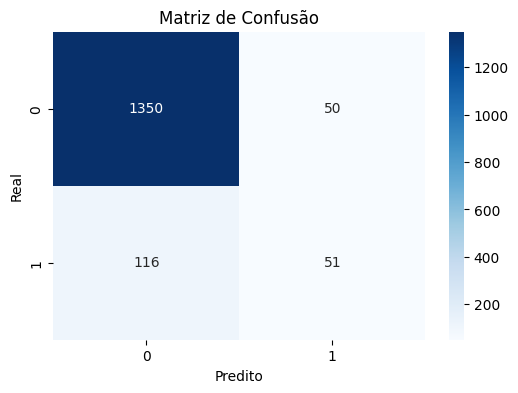

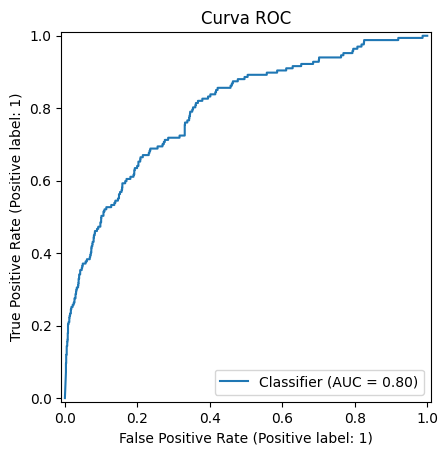

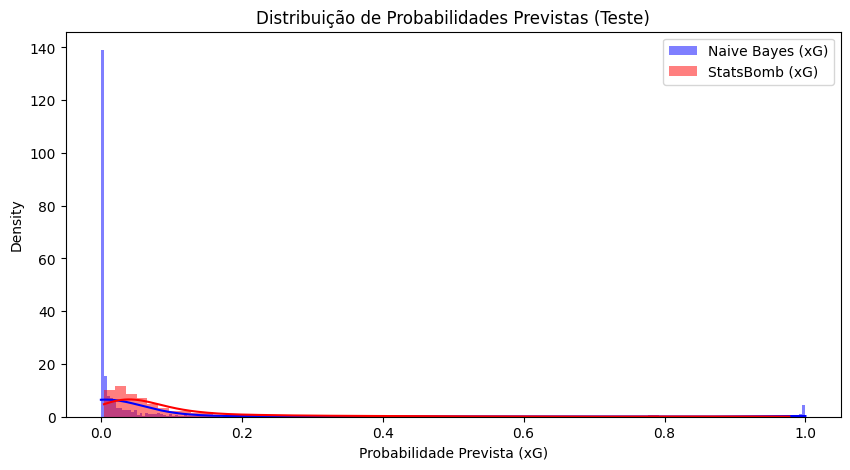

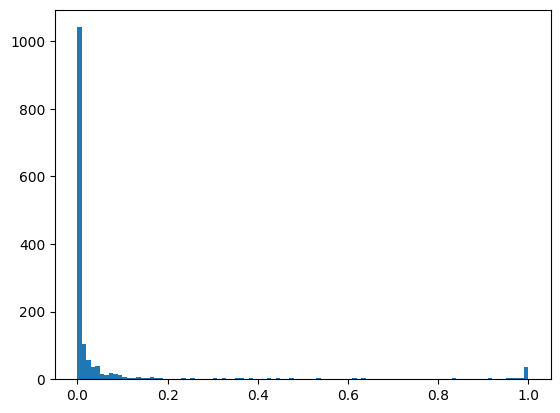

Min 5.166710081864098e-34
Max 1.0
Mean 0.08143833779961827


In [ ]:
model = Pipeline([
    ("gnb", GaussianNB(var_smoothing=0.0007742636826811277))
])

model.fit(X_train, y_train.values.ravel())
result(X_test, model)

# Treinamento 4 - Otimização de Hiperparâmetros + PCA

## Maximizando Acurácia

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ("pca", PCA()),
    ("gnb", GaussianNB())
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "pca__n_components": list(range(2, max_comp)),
    "gnb__var_smoothing": np.logspace(-20, -1, 10)
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhor parâmetro: {'gnb__var_smoothing': np.float64(1e-20), 'pca__n_components': 2}
Melhor score CV: 0.9051708487489449


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1400
           1       0.56      0.22      0.31       167

    accuracy                           0.90      1567
   macro avg       0.74      0.60      0.63      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0899


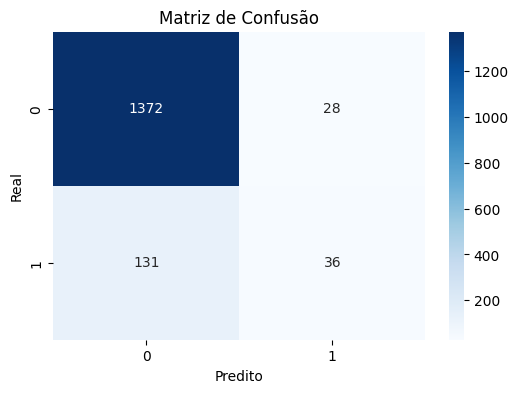

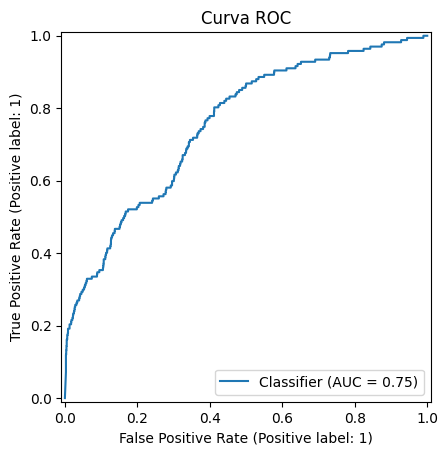

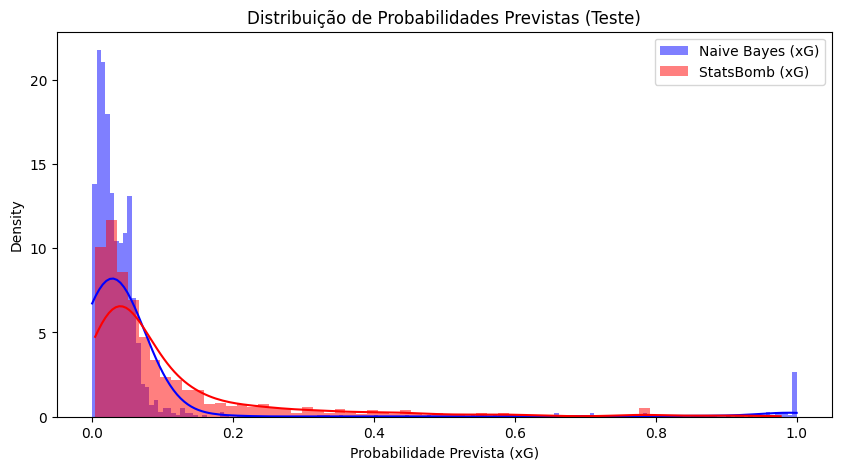

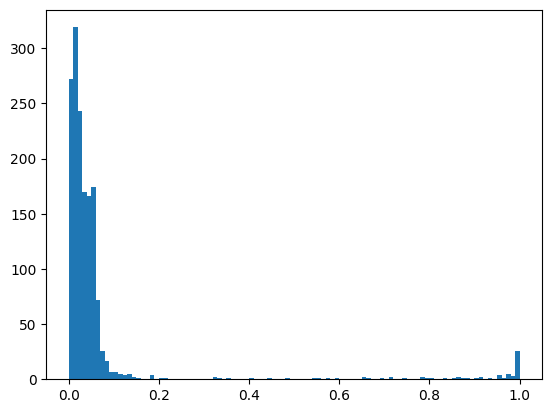

Min 9.731403162175363e-05
Max 1.0
Mean 0.06936629265168748


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB(var_smoothing=1e-20)
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## Maximizando Auc

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ("pca", PCA()),
    ("gnb", GaussianNB())
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "pca__n_components": list(range(2, max_comp)),
    "gnb__var_smoothing": np.logspace(-20, -1, 10)
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhor parâmetro: {'gnb__var_smoothing': np.float64(0.1), 'pca__n_components': 13}
Melhor score CV: 0.7956708493769742


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1400
           1       0.51      0.22      0.31       167

    accuracy                           0.89      1567
   macro avg       0.71      0.60      0.63      1567
weighted avg       0.87      0.89      0.88      1567


Brier Score:  0.0941


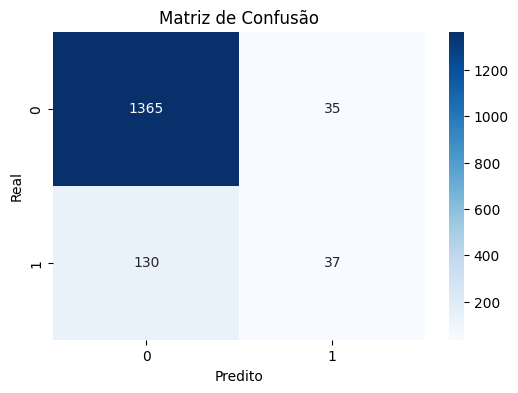

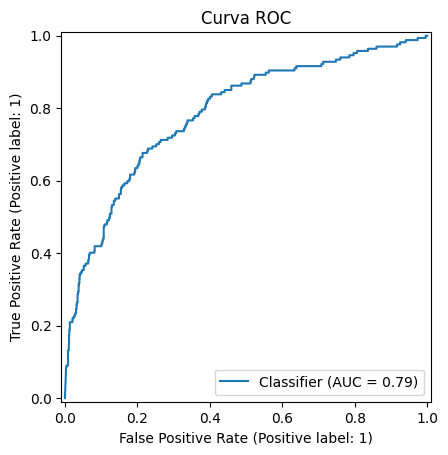

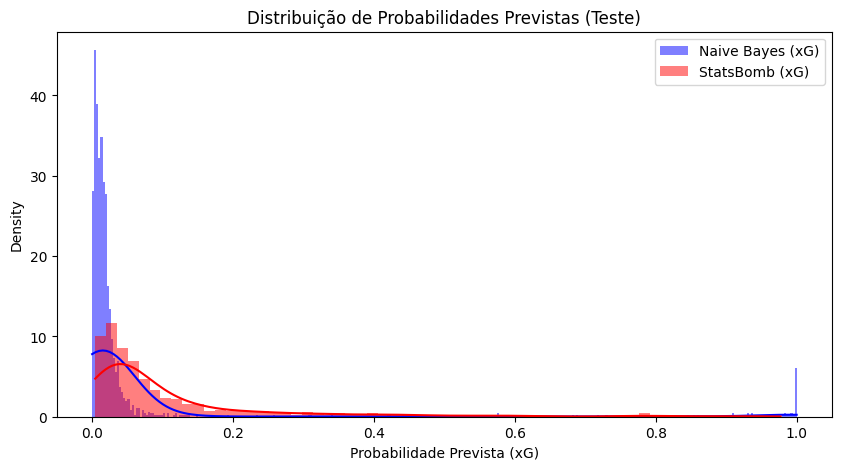

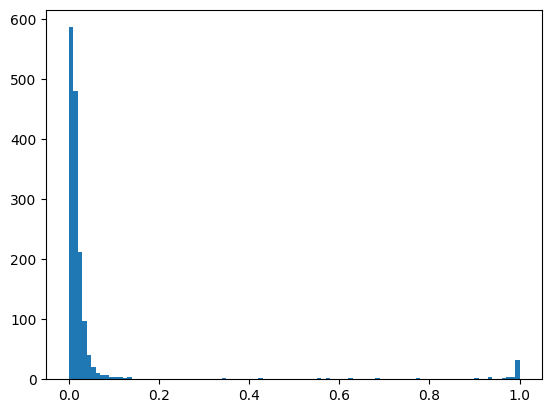

Min 3.917016230380463e-10
Max 1.0
Mean 0.06028216370246353


In [ ]:
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB(var_smoothing=0.1)
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## Maximizando Recall

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ("pca", PCA()),
    ("gnb", GaussianNB())
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "pca__n_components": list(range(2, max_comp)),
    "gnb__var_smoothing": np.logspace(-20, -1, 10)
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhor parâmetro: {'gnb__var_smoothing': np.float64(1e-20), 'pca__n_components': 19}
Melhor score CV: 0.28805970149253735


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1400
           1       0.48      0.31      0.38       167

    accuracy                           0.89      1567
   macro avg       0.70      0.64      0.66      1567
weighted avg       0.87      0.89      0.88      1567


Brier Score:  0.1043


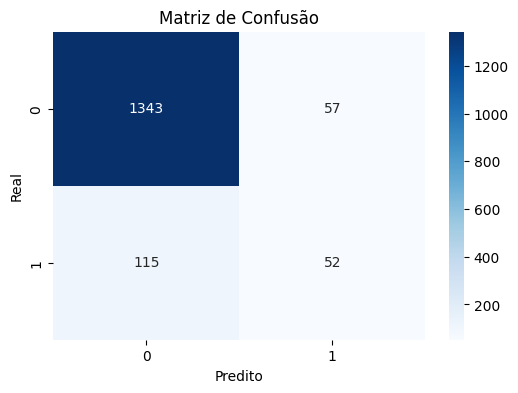

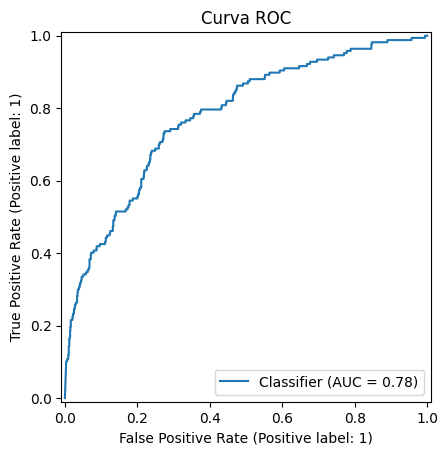

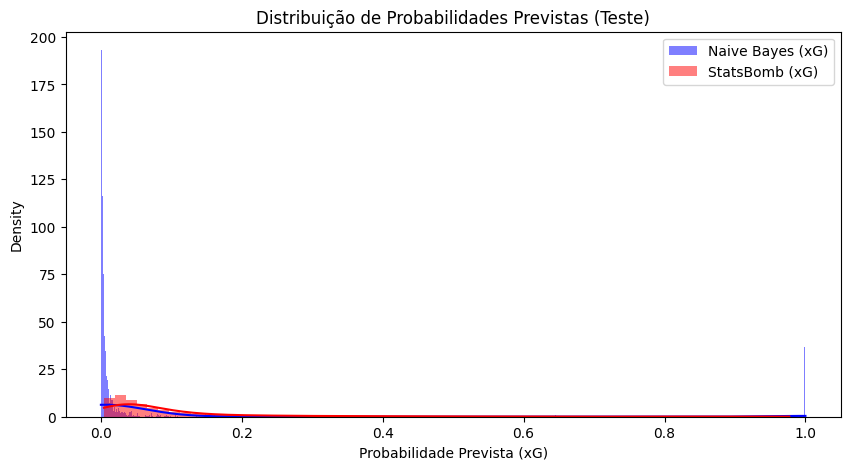

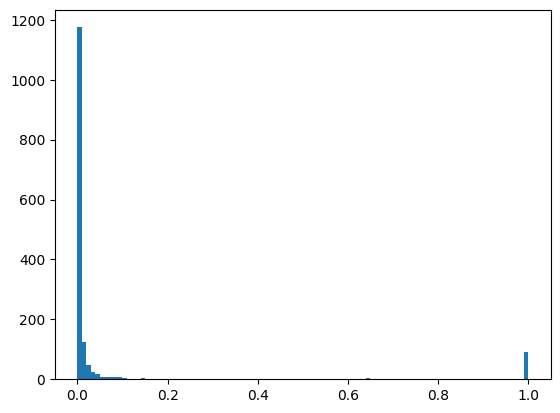

Min 4.609164381267374e-27
Max 1.0
Mean 0.07780250381111194


In [ ]:
pca = PCA(n_components=19)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB(var_smoothing=1e-20)
model.fit(X_train_pca, y_train)

result(X_test_pca, model)

## Minimizando Brier Score

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ("pca", PCA()),
    ("gnb", GaussianNB())
])

max_comp = min(X_train.shape[1], X_train.shape[0])

param_grid = {
    "pca__n_components": list(range(2, max_comp)),
    "gnb__var_smoothing": np.logspace(-20, -1, 10)
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_brier_score",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhor parâmetro: {'gnb__var_smoothing': np.float64(0.1), 'pca__n_components': 5}
Melhor score CV: -0.08408360499057846


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1400
           1       0.61      0.20      0.30       167

    accuracy                           0.90      1567
   macro avg       0.76      0.59      0.62      1567
weighted avg       0.88      0.90      0.88      1567


Brier Score:  0.0851


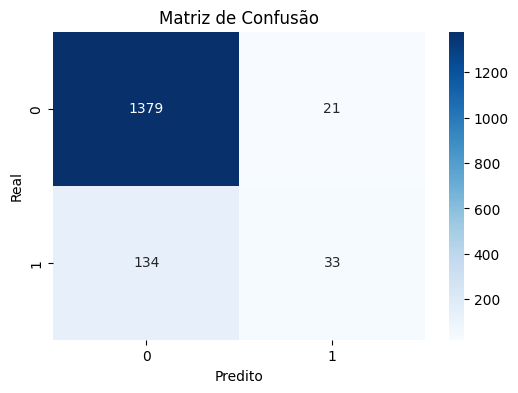

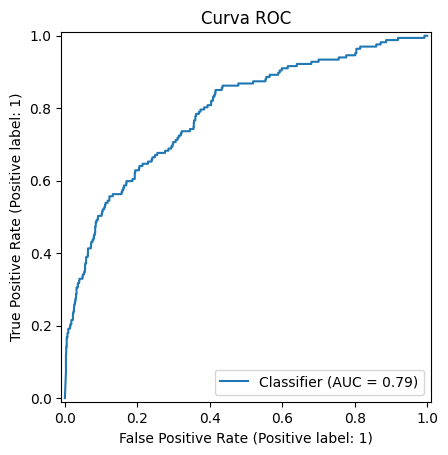

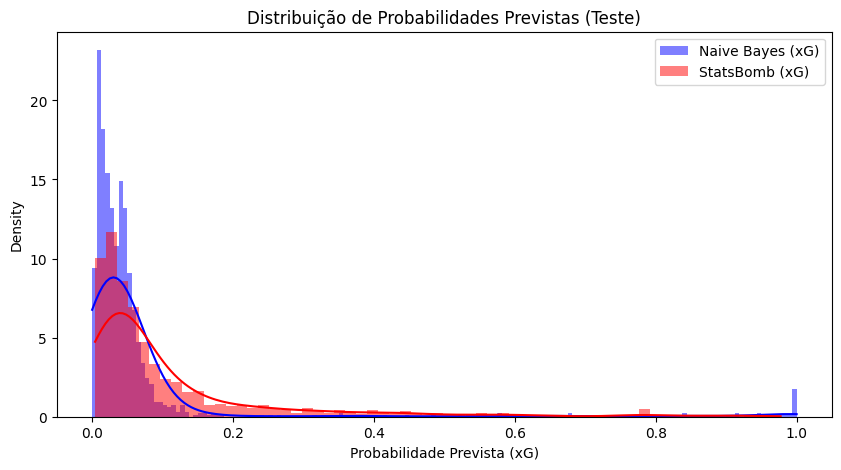

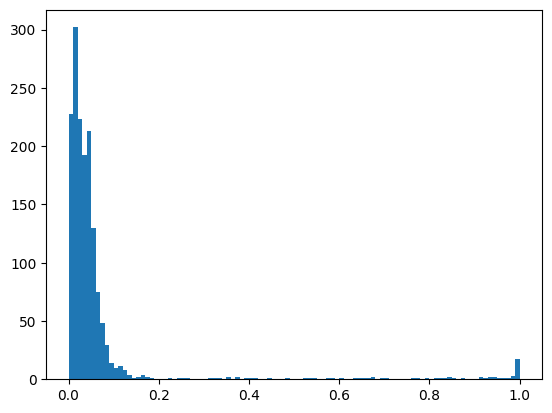

Min 0.00020152714451363967
Max 1.0
Mean 0.06683315309192124


In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = GaussianNB(var_smoothing=0.1)
model.fit(X_train_pca, y_train)

result(X_test_pca, model)